# LV-EZ1

測距モジュールです．

http://www.maxbotix.com/Raspberry-Pi-with-Ultrasonic-Sensors-144/

ここら辺を見れば何とかなる可能性が高い．

ここがけっこう参考になった．

https://www.raspberrypi.org/forums/viewtopic.php?t=36593&p=316692#

In [2]:
import time
import RPi.GPIO as GPIO

# Use BCM GPIO references
# instead of physical pin numbers
GPIO.setmode(GPIO.BCM)

# Define GPIO to use on Pi
#GPIO_TRIGECHO = 19

print "Ultrasonic Measurement"

# Set pins as output and input
#GPIO.setup(GPIO_TRIGECHO,GPIO.OUT)  # Initial state as output


# Set trigger to False (Low)
#GPIO.output(GPIO_TRIGECHO, False)

def measure(gp):
    GPIO_TRIGECHO = gp 
    GPIO.setup(GPIO_TRIGECHO,GPIO.OUT)
    GPIO.output(GPIO_TRIGECHO, False)
  # This function measures a distance
  # Pulse the trigger/echo line to initiate a measurement
    GPIO.output(GPIO_TRIGECHO, True)
    time.sleep(0.00001)
    GPIO.output(GPIO_TRIGECHO, False)
  #ensure start time is set in case of very quick return
    start = time.time()

  # set line to input to check for start of echo response
    GPIO.setup(GPIO_TRIGECHO, GPIO.IN)
    while GPIO.input(GPIO_TRIGECHO)==0:
        start = time.time()

  # Wait for end of echo response
    while GPIO.input(GPIO_TRIGECHO)==1:
        stop = time.time()
  
    GPIO.setup(GPIO_TRIGECHO, GPIO.OUT)
    GPIO.output(GPIO_TRIGECHO, False)

    elapsed = stop-start
    distance = (elapsed * 34300)/2.0
    time.sleep(0.1)
    return distance

try:

    while True:

        distance = measure(19)
        #time.sleep(0.01)
        distance2 = measure(6)
        distance3 = measure(26)
        print "  Distance1 : %.1f cm Distance2 : %.1f cm Distance3 : %.1f cm" % (distance,distance2,distance3)
        time.sleep(1)

except KeyboardInterrupt:
    print("Stop")
    GPIO.cleanup()

Ultrasonic Measurement
  Distance1 : 28.5 cm Distance2 : 108.5 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.1 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.0 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.1 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.0 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.0 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 47.5 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 47.5 cm Distance3 : 39.3 cm
  Distance1 : 28.5 cm Distance2 : 50.0 cm Distance3 : 39.3 cm
Stop


## グラフにプロットする

Back sensor
[28.46677303314209, 28.434062004089355, 28.41770648956299, 28.503572940826416]
Backward Left
[50.06014108657837, 47.504591941833496, 50.043785572052, 50.01107454299927]
Backward Right
[39.29412364959717, 39.30639028549194, 39.30639028549194, 39.290034770965576]


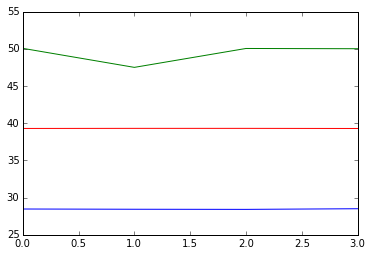

In [4]:
import time
import RPi.GPIO as GPIO
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

GPIO.setmode(GPIO.BCM)

dlist1 = []
dlist2 = []
dlist3 = []

def measure(gp):
    GPIO_TRIGECHO = gp 
    GPIO.setup(GPIO_TRIGECHO,GPIO.OUT)
    GPIO.output(GPIO_TRIGECHO, False)
  # This function measures a distance
  # Pulse the trigger/echo line to initiate a measurement
    GPIO.output(GPIO_TRIGECHO, True)
    time.sleep(0.00001)
    GPIO.output(GPIO_TRIGECHO, False)
  #ensure start time is set in case of very quick return
    start = time.time()

  # set line to input to check for start of echo response
    GPIO.setup(GPIO_TRIGECHO, GPIO.IN)
    while GPIO.input(GPIO_TRIGECHO)==0:
        start = time.time()

  # Wait for end of echo response
    while GPIO.input(GPIO_TRIGECHO)==1:
        stop = time.time()
  
    GPIO.setup(GPIO_TRIGECHO, GPIO.OUT)
    GPIO.output(GPIO_TRIGECHO, False)

    elapsed = stop-start
    distance = (elapsed * 34300)/2.0
    time.sleep(0.1)
    return distance

try:

    while True:

        dlist1.append(measure(19))
        dlist2.append(measure(6))
        dlist3.append(measure(26))
        #print "  Distance1 : %.1f cm Distance2 : %.1f cm Distance3 : %.1f cm" % (distance,distance2,distance3)
        time.sleep(1)

except KeyboardInterrupt:
    print("Back sensor")
    print(dlist1)
    print("Backward Left")
    print(dlist2)
    print("Backward Right")
    print(dlist3)
    plt.plot(dlist1)
    plt.plot(dlist2)
    plt.plot(dlist3)
    plt.show()
    GPIO.cleanup()